<a href="https://colab.research.google.com/github/Tdas-christ/Reinforcement_Learning/blob/main/2348569_RL_Lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Learned values for states 1 to 5:
State 1: V = -6.84
State 2: V = -6.16
State 3: V = -4.38
State 4: V = -2.06
State 5 (Terminal): V = 0.00


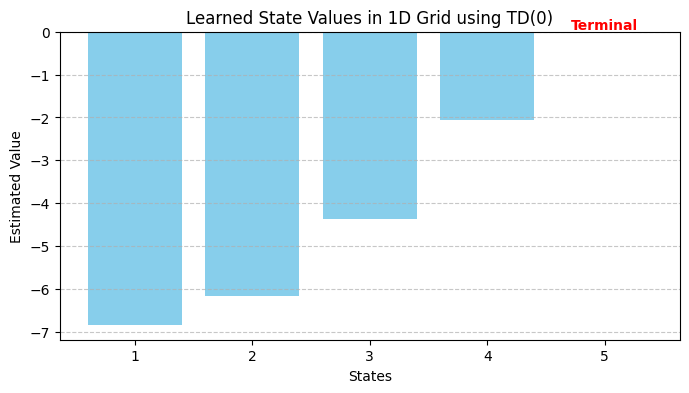

In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt

class OneDGridEnv:
    def __init__(self, num_states=5):
        self.num_states = num_states
        self.terminal_state = num_states
        self.reset()

    def reset(self):
        # Start at state 1 for simplicity
        self.state = 1
        return self.state

    def step(self, action):
        # action: -1 for left, +1 for right
        if self.state == self.terminal_state:
            # Already terminal
            return self.state, 0, True

        next_state = self.state + action
        # Bound the state between [1, num_states]
        next_state = max(1, min(self.num_states, next_state))

        # Reward
        if next_state == self.terminal_state:
            reward = 0
            done = True
        else:
            reward = -1
            done = False

        self.state = next_state
        return next_state, reward, done

    def sample_action(self):
        # Random policy: 50% chance go left, 50% chance go right
        return random.choice([-1, 1])


if __name__ == "__main__":
    # Environment and parameters
    env = OneDGridEnv(num_states=5)
    gamma = 0.9
    alpha = 0.1
    episodes = 2000

    # Initialize value function
    V = np.zeros(env.num_states+1)  # states are 1-based; index 0 unused

    # Training phase
    for ep in range(episodes):
        state = env.reset()
        done = False
        while not done:
            action = env.sample_action()
            next_state, reward, done = env.step(action)

            # TD(0) update:
            # V(s) = V(s) + alpha * [r + gamma * V(s') - V(s)]
            if done:
                target = reward  # terminal state has no next value
            else:
                target = reward + gamma * V[next_state]

            V[state] += alpha * (target - V[state])
            state = next_state

    # Print out the learned values
    print("Learned values for states 1 to 5:")
    for s in range(1, env.num_states+1):
        if s == env.terminal_state:
            print(f"State {s} (Terminal): V = {V[s]:.2f}")
        else:
            print(f"State {s}: V = {V[s]:.2f}")

    # Visualization
    # We'll create a bar chart showing the value of each state.
    states = np.arange(1, env.num_states+1)
    values = [V[s] for s in states]

    plt.figure(figsize=(8, 4))
    plt.bar(states, values, color='skyblue')
    plt.xlabel('States')
    plt.ylabel('Estimated Value')
    plt.title('Learned State Values in 1D Grid using TD(0)')

    # Annotate the terminal state
    plt.text(env.terminal_state, V[env.terminal_state]+0.05, 'Terminal', ha='center', color='red', fontweight='bold')

    # Add a grid
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(states)
    plt.show()
